build the random forest model after
normalizing the variable to house pricing from boston data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
features.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [6]:
targets = boston.target
targets


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
features.shape  #checking for data shape

(506, 13)

In [8]:
features['Targets'] = boston.target    #adding targets to features table

In [9]:
features.shape

(506, 14)

In [10]:
features.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Targets
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98     24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14     21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03     34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94     33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33     36.2

[5 rows x 14 columns]

In [11]:
features.dtypes      #checking for data types 

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Targets    float64
dtype: object

In [12]:
features.dtypes      #checking for data types 

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Targets    float64
dtype: object

In [13]:
features.describe() # description

CRIM          ZN       INDUS  ...           B       LSTAT     Targets
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

In [14]:
corr = features.corr()  #correlation
corr.shape

(14, 14)

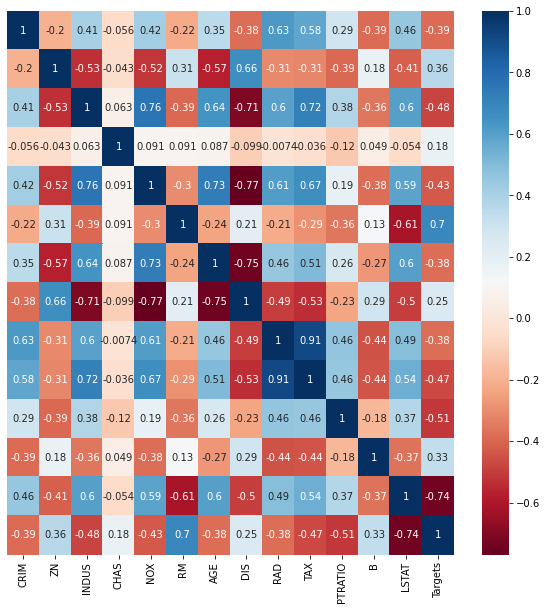

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='RdBu',yticklabels=False)

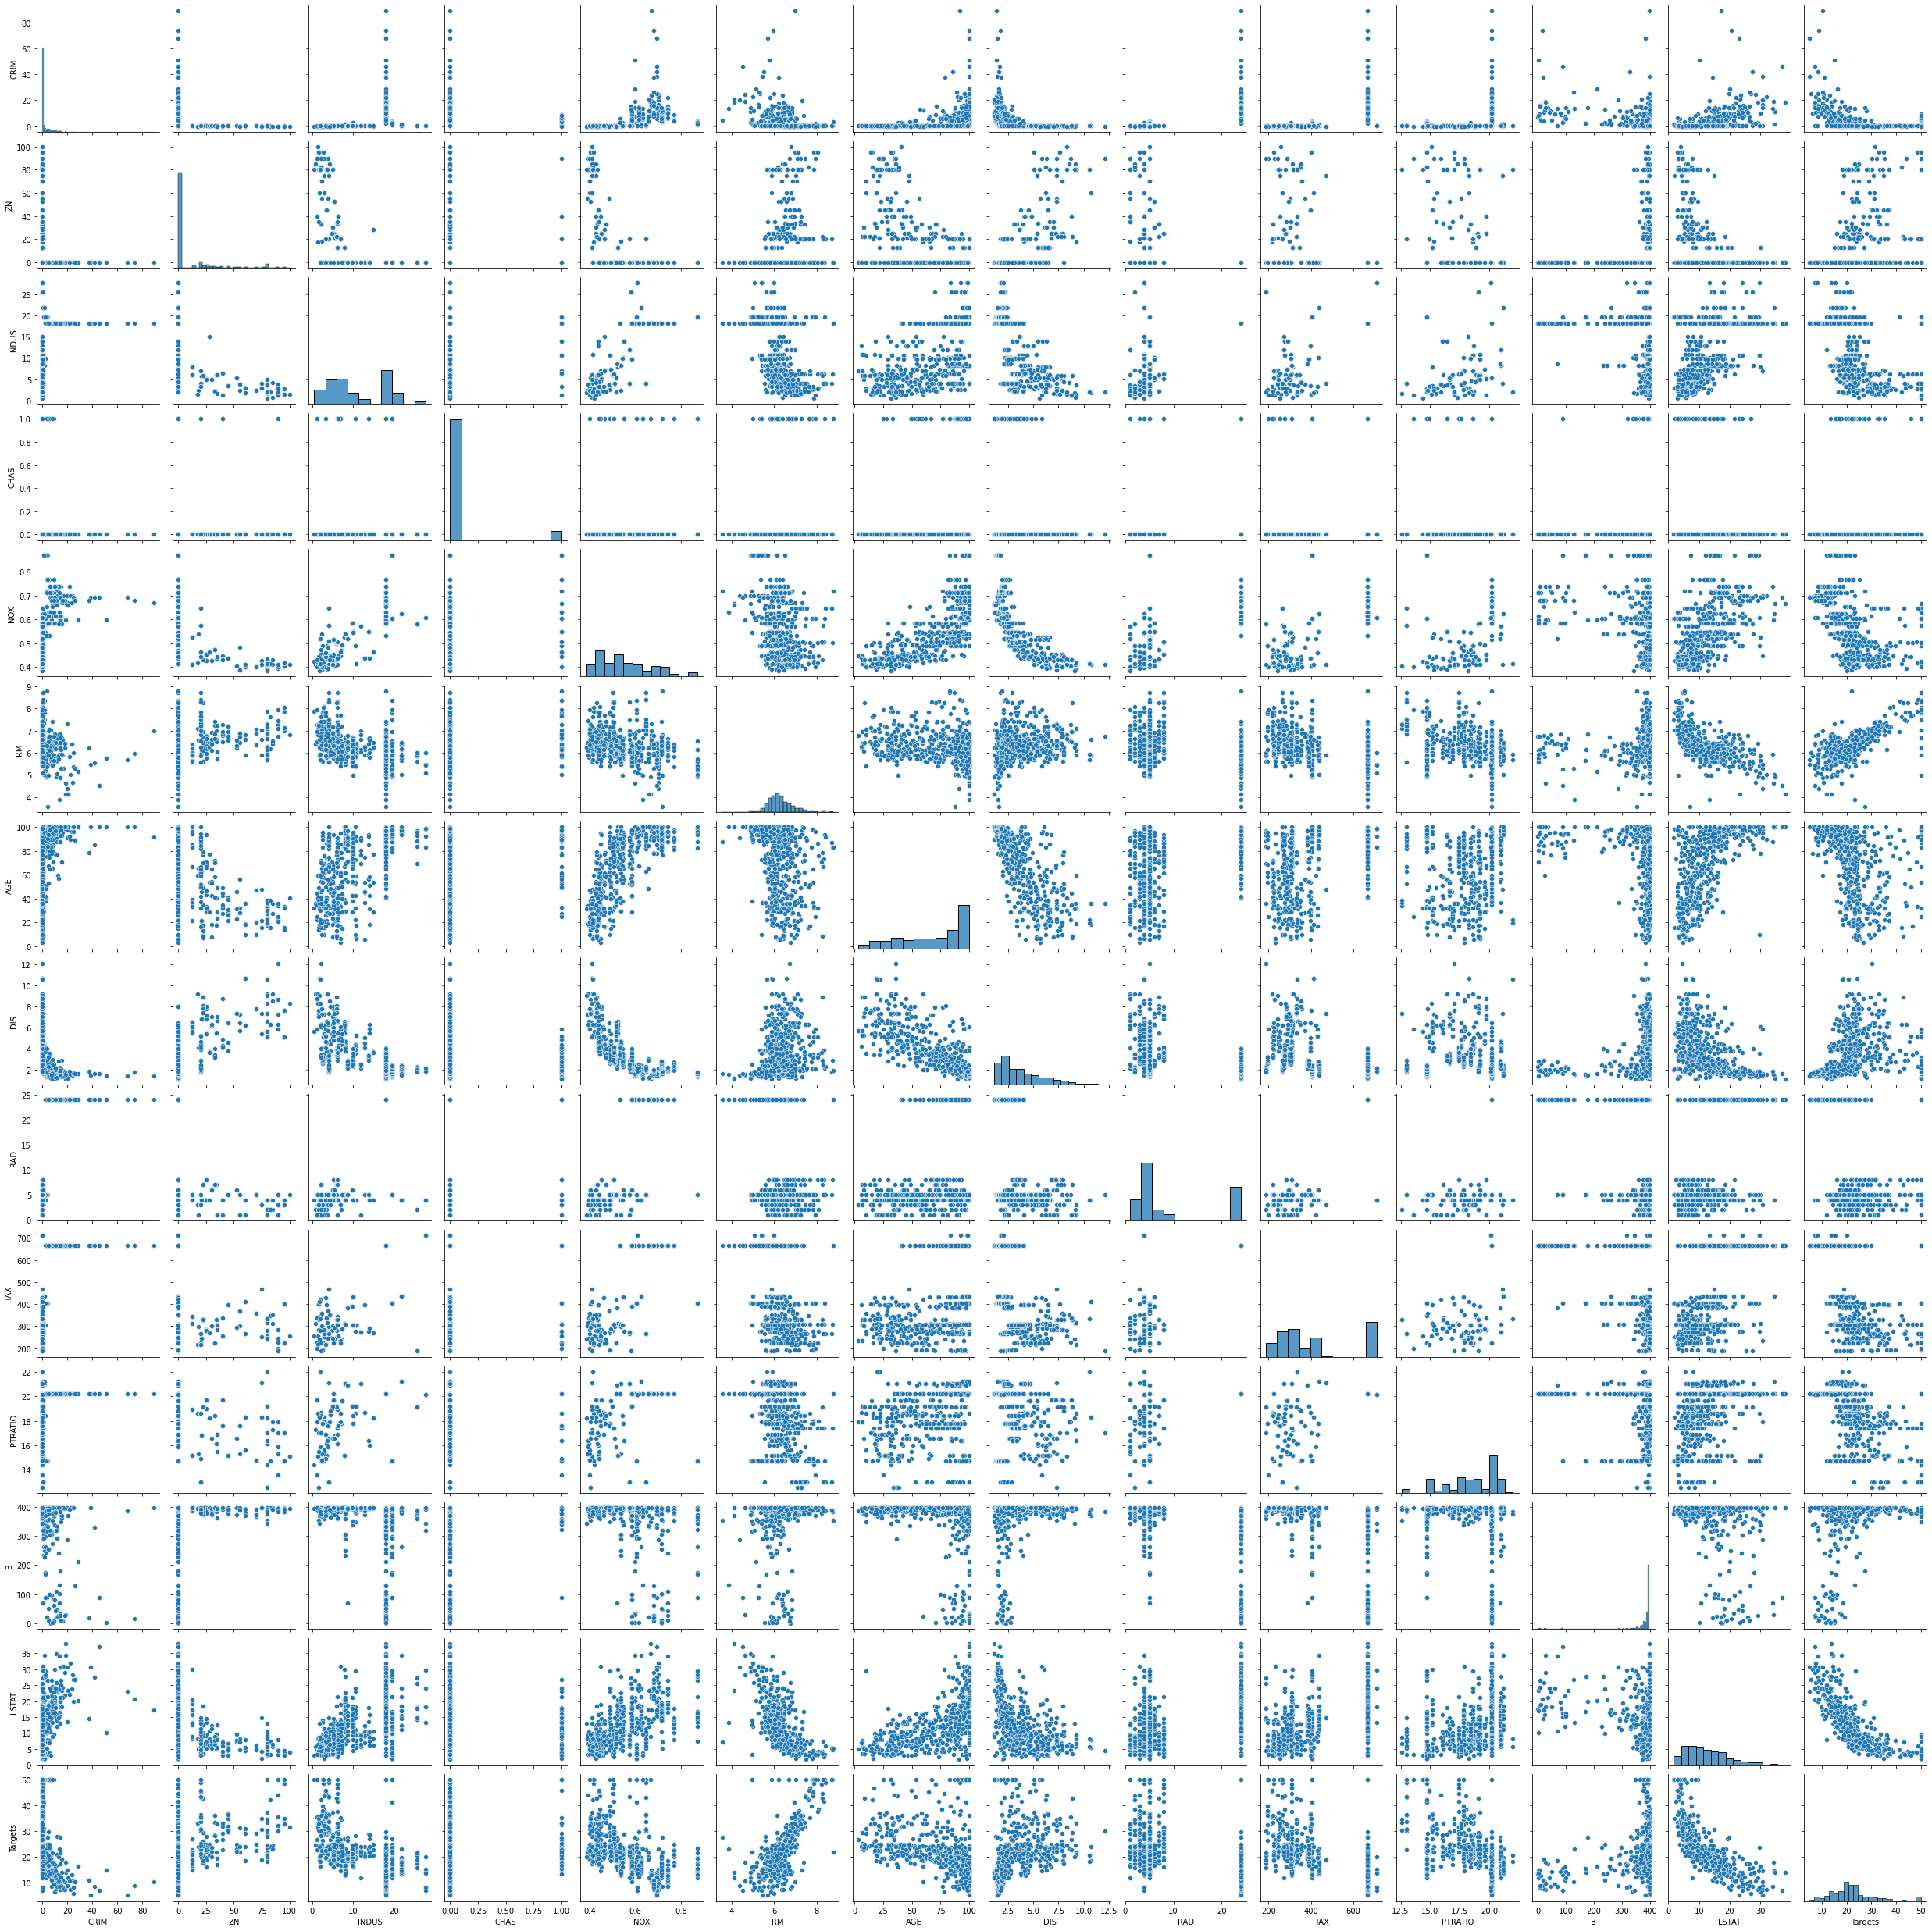

In [16]:
sns.pairplot(features)

In [17]:
from sklearn.model_selection import train_test_split
X = features.drop('Targets',axis=1)
y = features['Targets']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=355)

In [18]:
print(x_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
print(f"Train_model_score: {rfr.score(x_train,y_train)}")
print(f"Test_model_score: {rfr.score(x_test,y_test)}")

Train_model_score: 0.9762942525469239
Test_model_score: 0.8797122582046598


In [21]:
grid_params = {"n_estimators" : [10,40,65,100],
              "max_depth" : range(2,20,1),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [22]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfr,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


In [ ]:
grid_search.best_params_

In [ ]:
rfr2 = RandomForestRegressor(n_estimators=40,max_depth=19,min_samples_leaf=1,min_samples_split=4,max_features='log2')


In [ ]:
rfr2.fit(x_train,y_train)

In [ ]:
rfr2.score(x_test,y_test)

In [ ]:
y_pred = rfr2.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(f'R^2 : {r2_score(y_test,y_pred)}')
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')